# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Файл объёмом 8,1 Мб хранит в себе 22 столбца и 23699 строк. В данных есть пропущенные значения и несколько аномалий, к примеру, потолок под 100 метров.  

## Предобработка данных

Начнём с подсчёта и выяснения возможных причин появления пропусков в данных, по возможности постараемся их изменить.

In [5]:
for column in data:
    if  data[column].isna().sum() > 0:
        print(f'Кол-во пропущенных значений в {column}: {data[column].isna().sum()}, процент от общего кол-ва = {(data[column].isna().sum()/len(data)*100).round(2)}%')

Кол-во пропущенных значений в ceiling_height: 9195, процент от общего кол-ва = 38.8%
Кол-во пропущенных значений в floors_total: 86, процент от общего кол-ва = 0.36%
Кол-во пропущенных значений в living_area: 1903, процент от общего кол-ва = 8.03%
Кол-во пропущенных значений в is_apartment: 20924, процент от общего кол-ва = 88.29%
Кол-во пропущенных значений в kitchen_area: 2278, процент от общего кол-ва = 9.61%
Кол-во пропущенных значений в balcony: 11519, процент от общего кол-ва = 48.61%
Кол-во пропущенных значений в locality_name: 49, процент от общего кол-ва = 0.21%
Кол-во пропущенных значений в airports_nearest: 5542, процент от общего кол-ва = 23.38%
Кол-во пропущенных значений в cityCenters_nearest: 5519, процент от общего кол-ва = 23.29%
Кол-во пропущенных значений в parks_around3000: 5518, процент от общего кол-ва = 23.28%
Кол-во пропущенных значений в parks_nearest: 15620, процент от общего кол-ва = 65.91%
Кол-во пропущенных значений в ponds_around3000: 5518, процент от обще

Благодаря трём строчкам в коде мы смогли увидеть все пропущенные значения и процент от общего кол-ва значений в data. Пропущенные значения могли возникнуть по причине того, что человек просто не внёс те или иные данные в карточку своей квартиры.

In [6]:
# Заменим значения столбца, отвечающего за цену на момент снятия с публикации на int
data['last_price'] = data['last_price'].astype('int')
# Заменим значения столбца, отвечающего за кол-во этажей в доме на int
try:
    data['floors_total'] = data['floors_total'].astype('int')
except:
    pass
# Заменим значения столбца, отвечающего за кол-во балконов в доме на int
try:
    data['balcony'] = data['balcony'].astype('int')
except:
    pass
# Переведём время в понятный человеку формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# В данных существуют аномалии: высота потолков выше 15м, разделим эти значения на 10
data.loc[(data['ceiling_height'].isna() == False) & (data['ceiling_height']>15), 'ceiling_height'] /= 10
#Заменим все пропуски в булевом столбце апартаментов, на False (Нет)
data['is_apartment'] = data['is_apartment'].fillna(False)
# Заменим все пропуски в столбце балконов на 0
data['balcony'] = data['balcony'].fillna(0)
# Заменим все пропуски в столбце кол-ва парков вокруг на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# Заменим все пропуски в столбце кол-ва водоёмов вокруг на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# Удалим все строки с NaN значениями в столбцах максимальный этаж (86 пропусков ~ 0,3%) и местоположение (49 пропусков ~ 0,21%)
# Такое удаление не приведёт к видимому искажению, ведь кол-во удаляемых строк слишком мало
data.dropna(subset=['floors_total'], inplace = True)
data.dropna(subset=['locality_name'], inplace = True)
# Заменим пропуски в столбцах living_area и kitchen_area, исходя из медианы процентного отнощения всей площади к площади кухни или жилой площади  
kitchen_p = data['kitchen_area'].median()/data['total_area'].median()
living_p = data['living_area'].median()/data['total_area'].median()
data['kitchen_area'].fillna((kitchen_p*data['total_area'].round(2)), inplace = True)
data['living_area'].fillna((living_p*data['total_area']).round(2), inplace=True)

In [7]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.0000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,False,False,11.0000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,False,False,8.3000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,91.73,9,False,False,False,27.8250,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.0000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.30,3,False,False,False,13.8300,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.00,4,False,False,False,8.5000,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.70,1,False,False,False,9.9225,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,44.28,12,False,False,False,23.3000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [9]:
for column in data:
    if  data[column].isna().sum() > 0:
        print(f'Кол-во пропущенных значений в {column}: {data[column].isna().sum()}, процент от общего кол-ва = {(data[column].isna().sum()/len(data)*100).round(2)}%')
# Проверим на дубликаты
print(f'Кол-во дубликатов {data.duplicated().sum()}')        

Кол-во пропущенных значений в ceiling_height: 9084, процент от общего кол-ва = 38.55%
Кол-во пропущенных значений в airports_nearest: 5524, процент от общего кол-ва = 23.44%
Кол-во пропущенных значений в cityCenters_nearest: 5501, процент от общего кол-ва = 23.34%
Кол-во пропущенных значений в parks_nearest: 15535, процент от общего кол-ва = 65.92%
Кол-во пропущенных значений в ponds_nearest: 14529, процент от общего кол-ва = 61.65%
Кол-во пропущенных значений в days_exposition: 3171, процент от общего кол-ва = 13.46%
Кол-во дубликатов 0


### Вывод

В ходе предобработки данных были изменён тип некоторых столбцов на свойственный им, а также удалены и заменены строки с NaN значениями. ceiling_height не изменял, тк по среднему или медианному значению взять высоту поталков и заменить 40% данных будет не корректно, также со столбцами airports_nearest, cityCenters, parks_nearest (их просто нет рядом с квартирой, человек не стал вносить данные по паркам или аэропорту), ponds_nearest, days_exposition. Дуликаты не обнаружены.

## Расчёты и добавление результатов в таблицу

In [10]:
# Создадим новый столбец, в котором будут храниться значения цены за квадратный метр, округлённое до 2 знаков
data['cost_sqr_meter'] = (data['last_price']/data['total_area']).astype('int')
# Создадим 3 столбца: год, месяц и день выставления квартиры на продажу
data['year'] = data['first_day_exposition'].dt.year
'''data['week'] = data['first_day_exposition'].dt.isocalendar().week'''
data['month'] = data['first_day_exposition'].dt.month
data['day'] = data['first_day_exposition'].dt.weekday
# Создадим столбец, который будет нести информацию о этаже, на котором расположена квартира: первый, последний или "Другое"
def floor_gr(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'
data['floor_group'] = data.apply(floor_gr, axis=1)
# Создадим два новых столбца, в которых будут храниться отношение площади кухни и жилой площади к общей
data['kitchen_ratio'] = (data['kitchen_area']/data['total_area']).round(3)
data['living_ratio'] = (data['living_area']/data['total_area']).round(3)

In [11]:
# Проверим нет ли анамального значения (свыше 1) в столбцах living_area и kitchen_area
print(data['living_area'].sort_values(ascending=False).head())
data['kitchen_area'].sort_values(ascending=False).head()

19540    409.70
5358     409.00
3117     364.04
12401    347.50
4237     332.00
Name: living_area, dtype: float64


19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
Name: kitchen_area, dtype: float64

## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

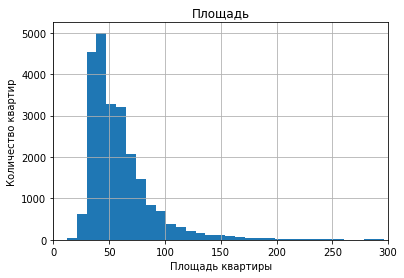

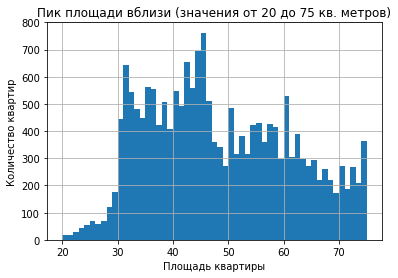

In [12]:
data['total_area'].plot.hist(title='Площадь', grid=True, xlim=(0,300), bins=100)
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

data['total_area'].plot.hist(title='Пик площади вблизи (значения от 20 до 75 кв. метров)', grid=True, range=(20,75), bins=55)
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

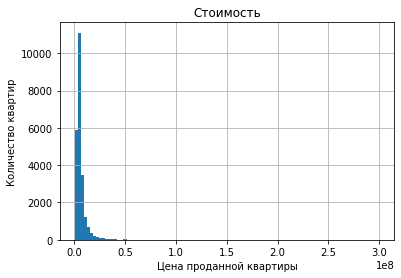

12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
19865    180000000
19155    160000000
2536     159984000
16495    159000000
1026     155000000
7857     150000000
15016    150000000
22229    148000000
12674    140000000
12859    140000000
Name: last_price, dtype: int64


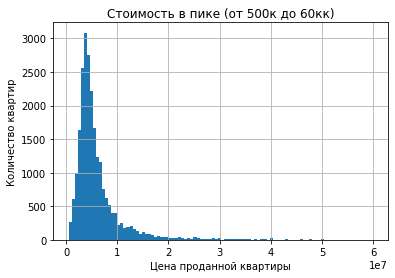

4646000.0

In [13]:
plt.hist(data['last_price'], bins=100, range=(430000,300000000))
plt.grid(True)
plt.xlabel('Цена проданной квартиры')
plt.ylabel('Количество квартир')
plt.title('Стоимость')
plt.show()

print(data['last_price'].sort_values(ascending=False).head(20))

plt.hist(data['last_price'], bins=100, range=(500000,60000000))
plt.grid(True)
plt.xlabel('Цена проданной квартиры')
plt.ylabel('Количество квартир')
plt.title('Стоимость в пике (от 500к до 60кк)')
plt.show()
data['last_price'].median()

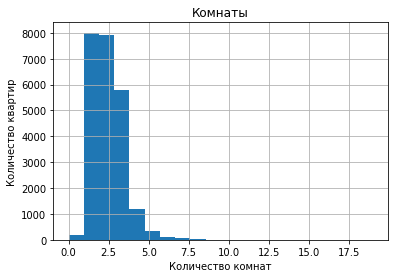

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


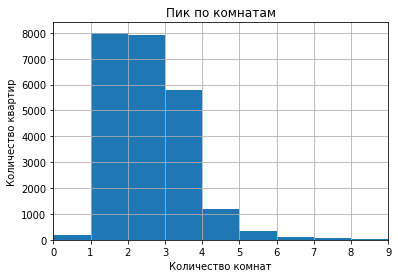

In [14]:
plt.hist(data['rooms'], bins=20, range=(0,19))
plt.grid(True)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Комнаты')
plt.show()

print(data['rooms'].value_counts())

plt.hist(data['rooms'], bins=9, range=(0,9))
plt.xlim(0,9)
plt.grid(True)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Пик по комнатам')
plt.show()

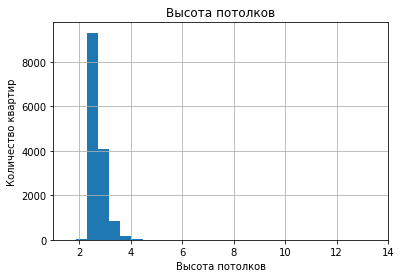

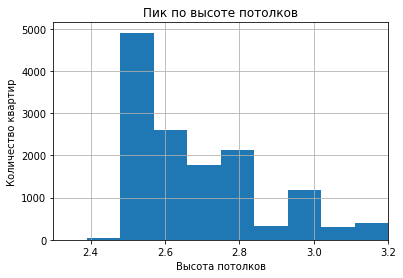

In [15]:
plt.hist(data['ceiling_height'], bins=30)
plt.xlim(1,14)
plt.grid(True)
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.title('Высота потолков')
plt.show()

'''print(data['ceiling_height'].median(), (data['ceiling_height'].mean()).round(2), (abs(data['ceiling_height'].median()-data['ceiling_height'].mean())).round(2))'''

plt.hist(data['ceiling_height'], bins=10, range=(2.3,3.2))
plt.xlim(2.3,3.2)
plt.grid(True)
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.title('Пик по высоте потолков')
plt.show()

#### Вывод

**Площадь** - Чаще всего площадь квартиры составляет от 25 до 100 кв. метров, максимальный пик - 30 - 45 кв.м.

**Стоимость** - Медианное значение стоимости квартиры варьируется в районе 5.000.000 рублей, в большинстве своём это значение от 2.000.000 до 10.000.000 рублей.

**Количество комнат** - большинство квартир имеют 1-3 комнаты.

**Высота потолков** - Чаще всего встречаются потолки в 2.5 метра, в среднем высота бывает от 2.5 до 3 метров.

### Изучим время продажи квартиры

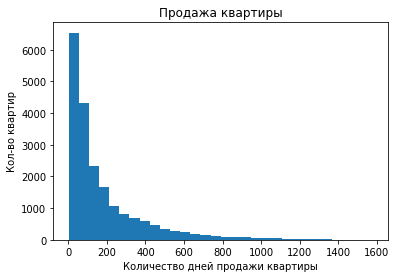

In [16]:
plt.hist(data['days_exposition'], bins=30)
plt.xlabel('Количество дней продажи квартиры')
plt.ylabel('Кол-во квартир')
plt.title('Продажа квартиры')
plt.show()

In [17]:
#data['days_exposition'].sort_values().head(10)
data.query('days_exposition == 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_sqr_meter,year,month,day,floor_group,kitchen_ratio,living_ratio
1632,19,4000000,49.9,2019-05-01,2,2.5,9.0,25.0,1,False,False,False,10.0,0.0,Санкт-Петербург,13567.0,14384.0,1.0,20.0,1.0,681.0,1.0,80160,2019,5,2,Первый,0.2,0.501


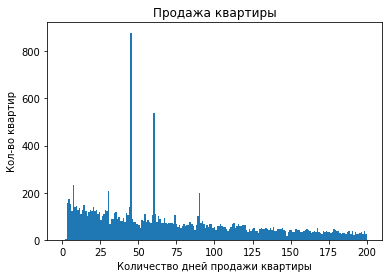

In [18]:
plt.hist(data['days_exposition'], bins=201, range=(0,200))
plt.xlabel('Количество дней продажи квартиры')
plt.ylabel('Кол-во квартир')
plt.title('Продажа квартиры')
plt.show()

In [19]:
data['days_exposition'].value_counts().head()

45.0    879
60.0    538
7.0     234
30.0    208
90.0    200
Name: days_exposition, dtype: int64

In [20]:
median_days_exposition = data['days_exposition'].median()
mean_days_exposition = data['days_exposition'].mean()

print(data['days_exposition'].describe())
print(f'Медианное значение по прадажам квартир равно {int(median_days_exposition)}, среднее - {int(mean_days_exposition)}')

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64
Медианное значение по прадажам квартир равно 95, среднее - 180


#### Вывод

В среднем, чтобы продать квартиру придёться ждать до 1,5 лет. Быстрая продажа квартир происходит от 1 дня до 3 месяцев, с чем это связано, мы поймём в дальнейшей аналитике, свыше 750 дней - необычно долгая продажа квартиры. В графике наблюдаются пики на 45, 60, 90, 7 и 30 дне, возможно это связано с определённым дедлайном по продаже и резким понижением цены, ввиду которой и происходит покупка в один из дней.

### Уберём редкие и выбивающиеся значения

In [21]:
def normal_values(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr =(q3-q1)*1.5
    return df.loc[(df[column] > q1-iqr) & (df[column] < q3+iqr), column]
    
column_list = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'kitchen_area', 'days_exposition']
for col in column_list:
    data[col] = normal_values(data, col)
    
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_sqr_meter,year,month,day,kitchen_ratio,living_ratio
count,23565.000000,2.151900e+04,22326.000000,23371.000000,13683.000000,23565.000000,23565.000000,23565.000000,22250.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,18721.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,4.837115e+06,54.319704,2.030208,2.680016,10.675875,34.621104,5.878124,9.417492,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,128.299343,9.940539e+04,2017.371016,6.401570,2.567367,0.186174,0.565890
std,5.681156,2.215774e+06,19.331030,0.973563,0.184476,6.594823,22.399830,4.871485,3.177448,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,121.064671,5.038944e+04,1.037393,3.492948,1.788279,0.069549,0.101112
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,2014.000000,1.000000,0.000000,0.025000,0.022000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.500000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,41.000000,7.656600e+04,2017.000000,3.000000,1.000000,0.137000,0.500000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,85.000000,9.500000e+04,2017.000000,6.000000,3.000000,0.175000,0.577000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.760000,16.000000,42.120000,8.000000,11.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,182.000000,1.142130e+05,2018.000000,10.000000,4.000000,0.224000,0.632000
max,50.000000,1.186686e+07,114.200000,5.000000,3.230000,60.000000,409.700000,33.000000,19.450000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,509.000000,1.907500e+06,2019.000000,12.000000,6.000000,0.788000,1.000000


#### Вывод

Теперь в столбцах last_price, total_area, rooms, ceiling_height, kitchen_area, days_exposition находятся только нормальные значения. Остальные столбцы не было смысла трогать, тк, к примеру, в столбце floor отбросилось бы анамальное значение 100, а вдруг это небоскрёб? Поэтому я тронул только необходимые.

### Какие факторы больше всего влияют на стоимость квартиры?

            last_price  total_area
last_price    1.000000    0.686702
total_area    0.686702    1.000000


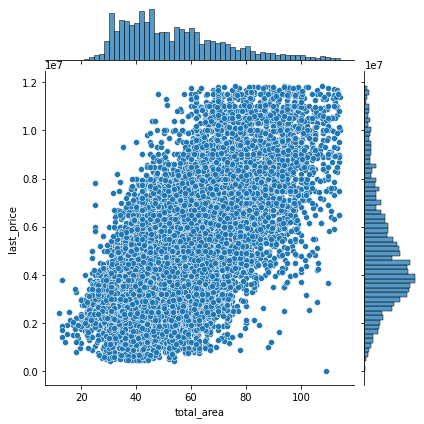

In [22]:
# Зависимость цены от площади квартиры
'''(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', title='Зависимость цены от площади квартиры')
)
plt.show()
'''

sns.jointplot(x='total_area', y='last_price', data=data)

print(data.pivot_table(index='total_images', values=['total_area', 'last_price']).corr())

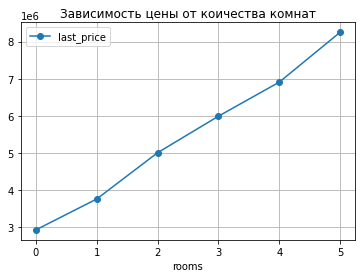

            last_price     rooms
last_price    1.000000  0.512437
rooms         0.512437  1.000000


In [23]:
# Зависимость цены от коичества комнат
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', title='Зависимость цены от коичества комнат')
)
plt.show()
print(data.pivot_table(index='total_images', values=['rooms', 'last_price']).corr())

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000   -0.609642
last_price                     -0.609642    1.000000


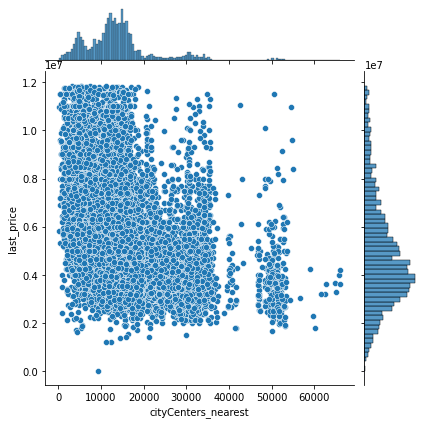

In [24]:
# Зависимость цены от удалённости от центра
'''(
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', title='Зависимость цены от удалённости от центра')
)
plt.show()'''

sns.jointplot(x='cityCenters_nearest', y='last_price', data=data)

print(data.pivot_table(index='total_images', values=['cityCenters_nearest', 'last_price']).corr())

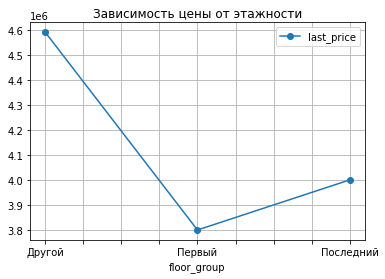

In [25]:
# Зависимость цены от этажности
(
    data.pivot_table(index='floor_group', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', title='Зависимость цены от этажности')
)
plt.show()

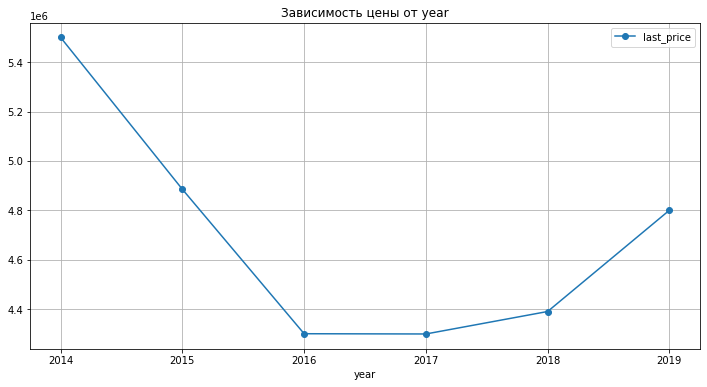

            last_price      year
last_price    1.000000  0.059905
year          0.059905  1.000000


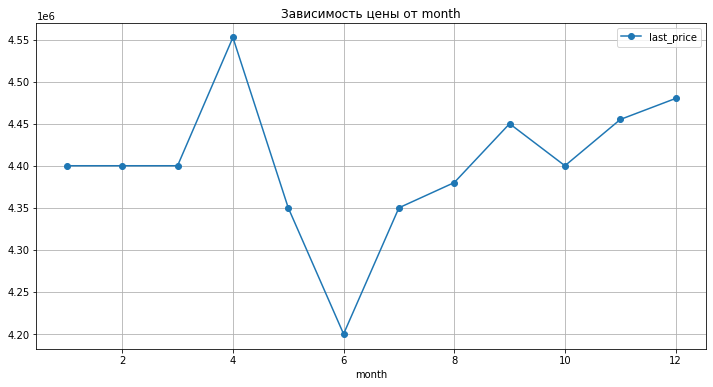

            last_price     month
last_price    1.000000  0.183935
month         0.183935  1.000000


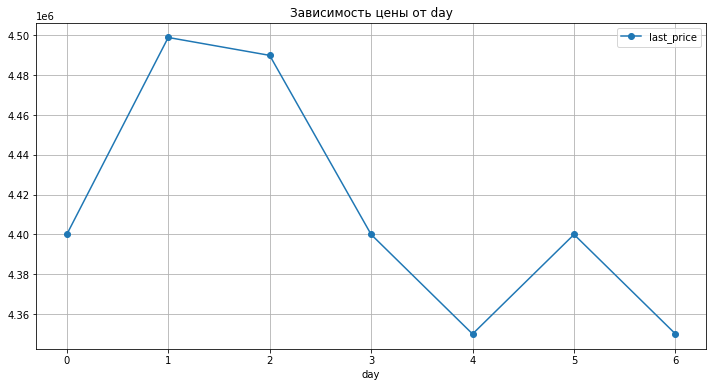

                 day  last_price
day         1.000000    0.287953
last_price  0.287953    1.000000


In [26]:
# Зависимость цены от удалённости от центра
def date_plot(df, column):
    
    (
        df.pivot_table(index=column, values='last_price', aggfunc='median')
        .plot(grid=True, style='o-', title=f'Зависимость цены от {column}', figsize=(12,6))
    )
    plt.show()
    print(df.pivot_table(index='total_images', values=[column, 'last_price']).corr())
    
list_plot=['year', 'month', 'day']
for column in list_plot:
    date_plot(data, column)

<AxesSubplot:>

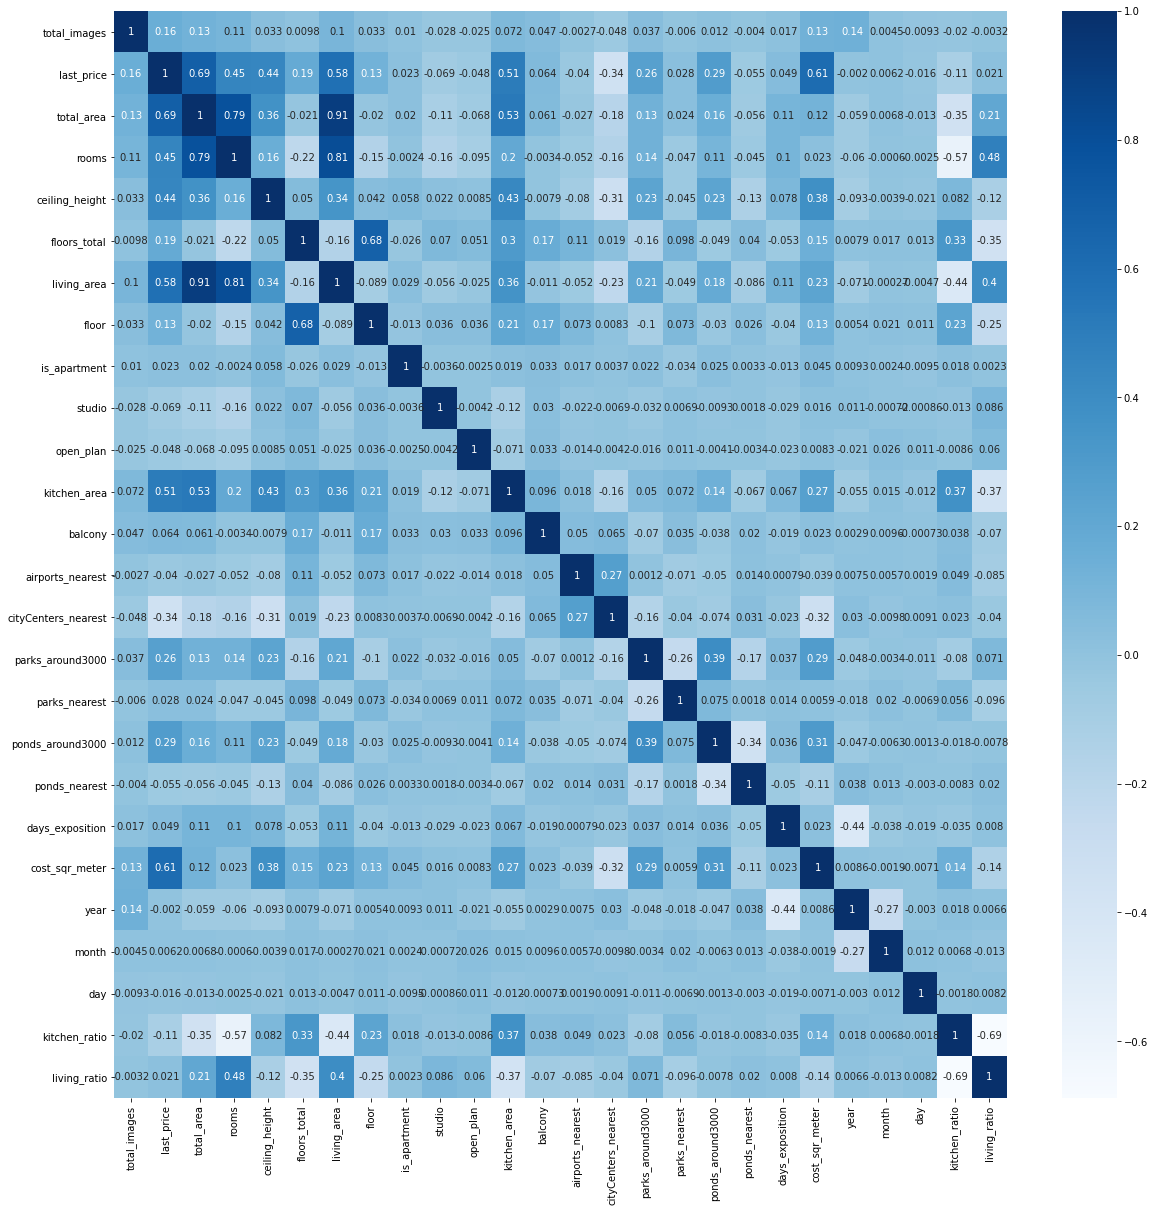

In [27]:
# Заодно сделаем общую корреляцию на heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap='Blues', annot=True, annot_kws={'size':10}, fmt='.2g')

#### Вывод

**Зависимость цены от площади квартиры** - Существует положительная корреляция между ценой квартиры и её площадью. Судя по графику до 40 кв. метров корреляция выражена более сильно (плотное распределение точек), далее идут небольшие разбросы. Итог: чем больше площадь, тем выше цена.

**Зависимость цены от коичества комнат** - Также существует положительная корреляция, но выражена она более слабой зависимостью, нежели в случае с площадью. Делаем вывод: просторная квартира с двумя комнатами будет стоить дороже, чем "узкая трёшка".

**Зависимость цены от удалённости от центра** - Существует отрицательная корреляция: чем ближе к центру, тем выше цена. Данные будто сгруппированы слоями: 0-18000 метров, 20000-38000, далее идёт пробел, скорее всего это какие-то парковые районы, трассы или леса, затем следует 48000-53000 метров и небольшой пучок данных свыше 60000 метров от центра. Скорее всего расстояние до 20км является центром Санкт-Петербурга.

**Зависимость цены от этажности** - Первый этаж выставляют дешевле всего, потом идёт последний этаж, дороже всего выставляют этажы между двумя вышеупомянутыми.

**Зависимость цены от времени (год, месяц, день недели)** - Существует очень слабая корреляция, я бы даже сказал, что её нет. На графике цена-года мы можем увидеть как менялась медианное значение цен квартиры сквозь года. Начиная с 2014 года цена сильно опустилась и стабилизировалась с 2016 по 2017 год, сейчас мы можем видеть возрастание цены. Говоря о месецах: апрель - самый "дорогой" месяц, его антиподом является июнь - самый "дешёвый". В понедельник чаще всего выставляют по высокой цене, а в четверг по низкой, но здесь нет корреляции от слова совсем.

**Зависимость цены от парков** - Существует положительная корреляция. Есть небольшая зависимость от цены и кол-ва парков в окрестностях вкартиры, скорее всего это вызвано ретмом и комфортом(удобством) жизни.

**Зависимость цены от высоты потолков** - Существует положительная корреляция, скорее всего дело в пространстве, не ве хотят быть зажаты в 4 стенах с низкими потолками. Комфорт проживания - повышенная цена.

### Выберем 10 населённых пунктов с наибольшим числом объявлений

In [28]:
top_10_locality = data['locality_name'].value_counts().head(10)

sm_top = (
    data.query('locality_name in @top_10_locality.index')
    .pivot_table(index='locality_name', values='cost_sqr_meter')
)
sm_top = sm_top.astype('int').sort_values('cost_sqr_meter', ascending=False)
sm_top

,cost_sqr_meter
locality_name,
Санкт-Петербург,114868
Пушкин,103125
деревня Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85672
посёлок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


#### Вывод

Как и ожидалось самая большая стоимость за кв метр - СПБ. Пушкин, который находится чуть дальше, чем деревня Кудрово стоит на втором месте, скорее всего это определённая зависимость, к примеру, рядом с этим районом большее кол-во парков или водоёмов, лучшее условие жизни для семьи.  На последнем месте - Выборг.

### Изучим предложения квартир

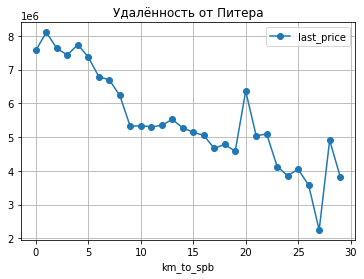

In [29]:
data['km_to_spb'] = (data['cityCenters_nearest']/1000).fillna(0).astype('int')
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='km_to_spb', values='last_price')
    .plot(grid=True, style='o-', title='Удалённость от Питера')
)
plt.show()

In [30]:
data.query('km_to_spb == 20').sort_values('last_price', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_sqr_meter,year,month,day,floor_group,kitchen_ratio,living_ratio,km_to_spb
6353,0,11620701.0,NaN,2018-10-01,2.0,2.8,3.0,70.56,3,True,False,False,NaN,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,NaN,95017,2018,10,0,Последний,0.175,0.577,20
21809,20,10600000.0,77.0,2019-04-16,2.0,NaN,35.0,39.00,11,False,False,False,14.000,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,137662,2019,4,1,Другой,0.182,0.506,20
17638,10,10487000.0,72.9,2014-12-09,2.0,2.7,3.0,25.00,2,False,False,False,NaN,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,NaN,143854,2014,12,1,Другой,0.432,0.343,20
1917,13,10150000.0,74.0,2017-11-17,2.0,2.8,35.0,34.40,30,False,False,False,13.000,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,137162,2017,11,4,Другой,0.176,0.465,20
19521,6,10000000.0,71.0,2019-01-22,2.0,3.0,3.0,35.00,3,False,False,False,12.425,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,NaN,140845,2019,1,1,Последний,0.175,0.493,20
18218,4,9900000.0,101.0,2018-09-27,3.0,NaN,35.0,53.40,33,False,False,False,13.700,2.0,Санкт-Петербург,18737.0,20450.0,0.0,NaN,3.0,72.0,7.0,98019,2018,9,3,Другой,0.136,0.529,20
11575,9,9900000.0,101.0,2016-04-28,3.0,NaN,33.0,53.00,32,False,False,False,NaN,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0,98019,2016,4,3,Другой,0.208,0.525,20
20938,18,9900000.0,100.9,2019-04-08,3.0,NaN,35.0,53.40,22,False,False,False,13.400,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,98116,2019,4,0,Другой,0.133,0.529,20
20368,8,9897258.0,85.2,2018-07-23,3.0,3.0,4.0,48.48,3,True,False,False,10.200,2.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,NaN,116165,2018,7,0,Другой,0.120,0.569,20
14459,4,9635328.0,76.8,2018-10-01,1.0,2.8,3.0,44.31,3,True,False,False,13.440,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,30.0,125460,2018,10,0,Последний,0.175,0.577,20


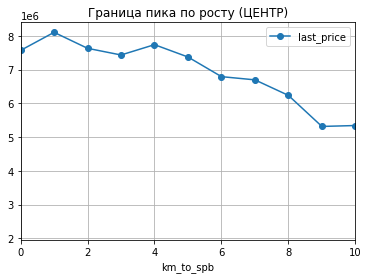

In [31]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='km_to_spb', values='last_price')
    .plot(grid=True, style='o-', title='Граница пика по росту (ЦЕНТР)', xlim=(0,10))
)
plt.show()

#### Вывод

График плавно ползёт вверх до 9 км - это центр города, в котором цены на квартиру повышены. На 20 км резкий пик из-за квартир в Питере, тк мы берём среднее значение.

### Выделим сегмент квартир в центре и проанализируем эту территорию

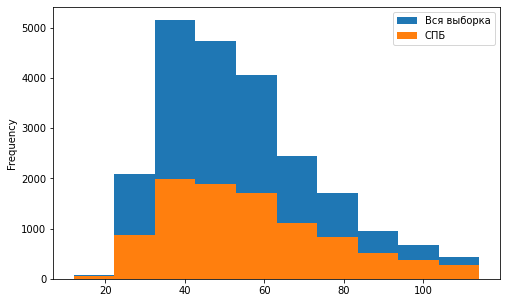

Среднее значение по столбцу total_area равно 52.8
42.0    152
43.0    146
44.0    142
Name: total_area, dtype: int64


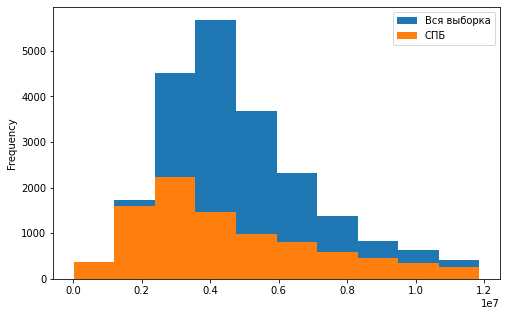

Среднее значение по столбцу last_price равно 3794000.0
3500000.0    113
3100000.0    110
2500000.0    104
Name: last_price, dtype: int64


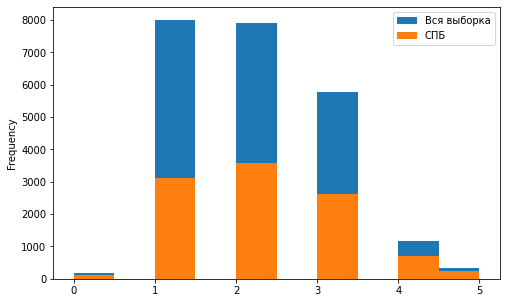

Среднее значение по столбцу rooms равно 2.0
2.0    3586
1.0    3123
3.0    2621
Name: rooms, dtype: int64


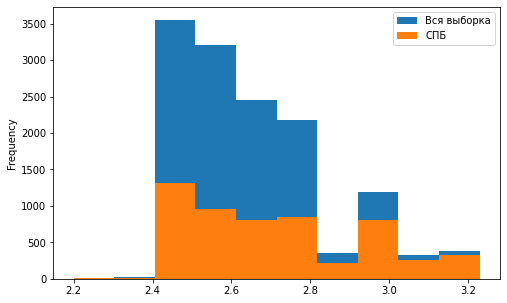

Среднее значение по столбцу ceiling_height равно 2.7
2.5    1292
3.0     746
2.7     616
Name: ceiling_height, dtype: int64


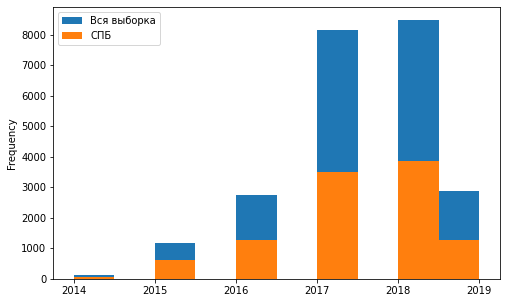

Среднее значение по столбцу year равно 2017.0
2018    3852
2017    3512
2016    1271
Name: year, dtype: int64


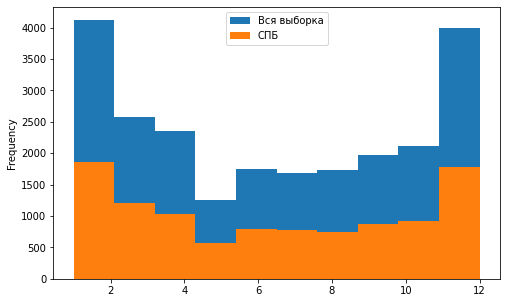

Среднее значение по столбцу month равно 6.0
3    1209
2    1177
4    1026
Name: month, dtype: int64


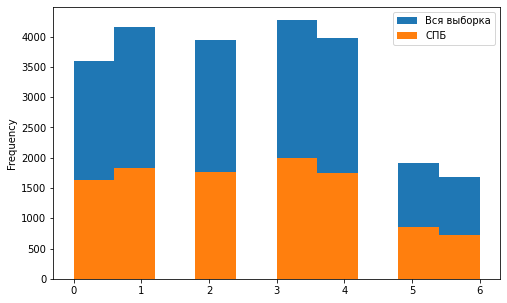

Среднее значение по столбцу day равно 3.0
3    2002
1    1827
2    1771
Name: day, dtype: int64


In [35]:
center_realty = data.query('km_to_spb <= 9')
list_plot=['total_area', 'last_price', 'rooms', 'ceiling_height', 'year', 'month', 'day']
'''def center_plot(df, column):
    df[column].plot(kind='hist', bins=30, figsize=(6,8), title=f'Анализ {column} в центре СПБ', grid=True)
    plt.show()
    print(f'Среднее значение по столбцу {column} равно {df[column].median()}')
    print(df[column].value_counts().head(3))
for col in list_plot:
    center_plot(center_realty, col)'''
def center_plot(df1, df2, column):
    ax = df1[column].plot(kind = 'hist', figsize=(8,5), legend=True, label='Вся выборка')
    df2[column].plot(kind='hist', ax=ax, legend=True, label='СПБ')
    plt.show()
    print(f'Среднее значение по столбцу {column} равно {df2[column].median()}')
    print(df2[column].value_counts().head(3))
for col in list_plot:
    center_plot(data, center_realty, col)

<AxesSubplot:>

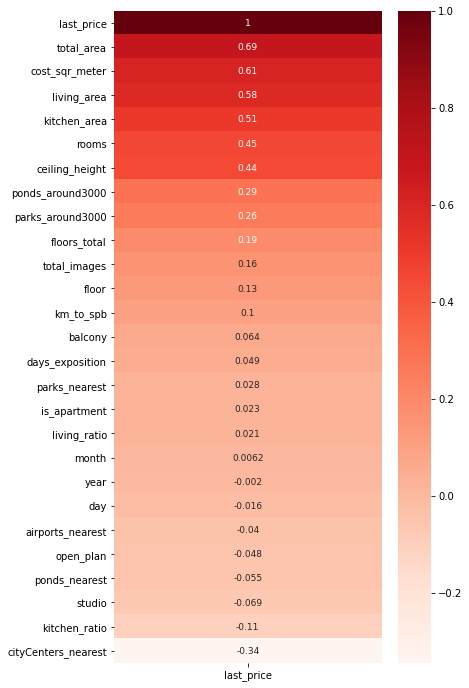

In [33]:
# Сравним две корреляции по цене: Начнём с общей
plt.figure(figsize=(6,12))
sns.heatmap(data.corr()[['last_price']].sort_values('last_price', ascending=False), cmap='Reds', annot=True, annot_kws={'size':9})

<AxesSubplot:>

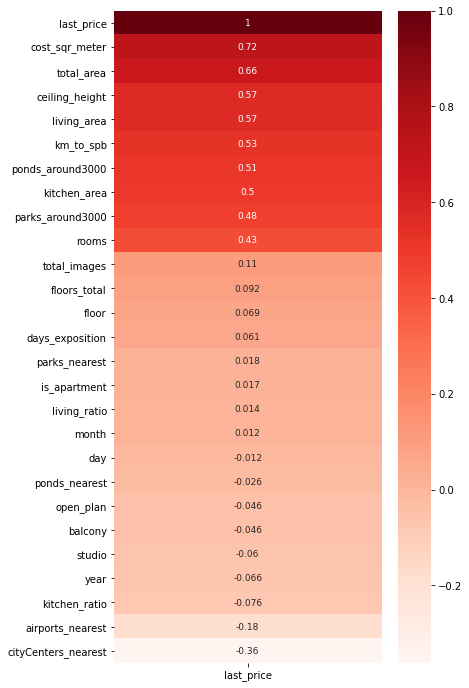

In [34]:
# Корреляция по СПБ
plt.figure(figsize=(6,12))
sns.heatmap(center_realty.corr()[['last_price']].sort_values('last_price', ascending=False), cmap='Reds', annot=True, annot_kws={'size':9})

#### Вывод

Значение цены намного выше в центре питера, нежели в самом питере или ЛО. Площадь в среднем выдаёт такое же значение от 20 до 60 кв. метров. Если говорить о комнатах, то чаще всего преобретают 2-х комнатные квартиры, далее идут 1-ые и 3-ые, самым нечастым вариантом выставления на продажу является студия. Потолки такие же, что и в ЛО, наиболее распространённые значения: 2.5, 2.7, 3 метра. Корреляция повышена по всем значениям ближе к центру.

## Общий вывод

В ходе исследования были обнаружены следующие ошибки: некоторые анамалии, которые выбиваются из общего графика, неправильный тип данных в столбцах и конечно же многочисленные пропуски в данных. Последнее можно было избежать, только если в приложении или на сайте исправить все необязательные поля на обязательные, тогда пользователь был бы обязан заполнить все значения и пропуски NaN не могли были бы присутствовать в выборке. Также для удобства исследования были добавлены следубщие слобцы: стоимость кв. метра, этажность квартиры (разбил по группам), процент жилой/куханной площади от общей и временные столбцы(год, месяц, день недели). Это позволило мне сделать более гибкую и точную аналитику, изучить дополнительные графики и сделать определённые выводы по ним, кстати о выводах...

Моей задачей было установить параметры для определения рыночной стоимости объектов недвижимости. Я решил вывести heatmap общей корреляции, чтобы с точностью можно было рассказать о том какие параметры влияют на стоимоть квартиры, а какие нет. Хочу обратить ваше внимание на сравнительные графики между всей выборкой(ЛО и СПБ) и центром СПБ, это позволит операться на более точную статистику, ведь, как я выяснил, расстояние до центра имеет отрицательную корреляцию и в разных районах, исходя от удалённости своя стоимость за кв. метр.

Подводя итог, можно с уверенностью заявить, что сильно на цену влияют следубщие параметры: отдалённость от центра, площадь влияет больше, чем кол-во квартир (пользователь выберет просторную двушку, нежели "скованную" трёшку), высота потолков, а также кол-во парков и водоёмов поблизости.